In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_csv('./seaborn-data/titanic.csv')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


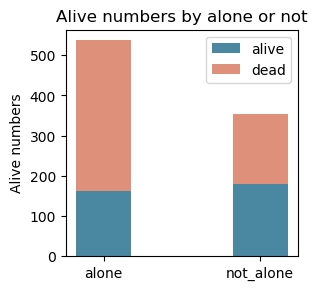

In [2]:
# 4.分析单独乘船与否和幸存之间的关系（统计柱状图）
# 统计单独乘船的幸存人数和非单独乘船的幸存人数
labels = ['alone', 'not_alone']
alive_num = [0, 0]
dead_num = [0, 0]

for i in range(len(data)):
    if (data.alive[i] == 'yes' and data.alone[i] == True):
        alive_num[0] +=1
    elif (data.alive[i] == 'yes' and data.alone[i] == False):
        alive_num[1] +=1
    elif(data.alive[i] == 'no' and data.alone[i] == True):
        dead_num[0] +=1
    elif (data.alive[i] == 'no' and data.alone[i] == False):
        dead_num[1] +=1

width = 0.35       # the width of the bars: can also be len(x) sequence
fig,ax=plt.subplots(figsize=(3,3),dpi=100)
ax.bar(labels,alive_num, width, label = 'alive', color = '#4A87A1')
ax.bar(labels,dead_num, width, bottom = alive_num, label='dead', color = '#DE907B')
ax.set_ylabel('Alive numbers')
ax.set_title('Alive numbers by alone or not')
ax.legend()
plt.show()

R2 = 0.01
[[0.33745142]] [22.6185601]


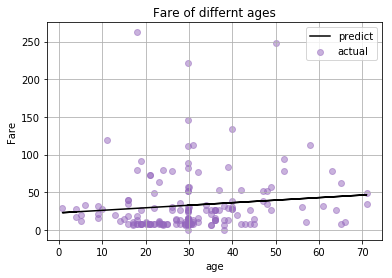

In [3]:
# 5.乘客年龄和船票价格之间的关系
# 线性回归模型
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#从sklearn包中导入cross_balidation包
# 数据预处理：去NAN值
data=data.fillna(data.mean())

x_train, x_test,y_train, y_test = train_test_split(data.age,data.fare,test_size=0.2, random_state=42) 

#将数据分为训练的X_train, Y_train, 训练的X_test, X_train.
#X1_scaled,是读取数据的X的值，Y1_scaled是读取数据的Y值#test_siza = 0.2是把20%给测试，80%给训练。

x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]
# scaler = preprocessing.StandardScaler().fit(np.vstack((x_train, x_test)))
# x_train = scaler.transform(x_train)


model = LinearRegression()
model.fit(x_train, y_train) 
predicts = model.predict(x_test)
R2 = model.score(x_train, y_train)
print('R2 = %.2f' % R2)

coef = model.coef_
intercept = model.intercept_
print(model.coef_, model.intercept_)


fig,ax = plt.subplots()
ax.set_title("Fare of differnt ages") 
ax.set_xlabel("age") 
ax.set_ylabel("Fare") 
ax.scatter(x_test,y_test,alpha=0.5, c = '#9467bd',label='actual') 
ax.plot(x_test, predicts, color = 'k',label = 'predict')
plt.grid(True)
plt.legend()
plt.show()

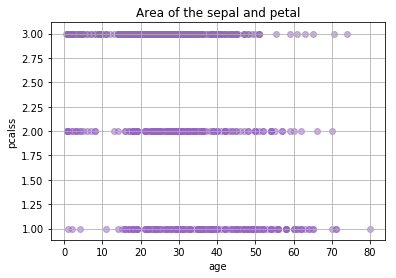

In [4]:
#6.乘客年龄和仓位等级之间的关系（带抖动的散点图）
age = data.age
pclass = data.pclass

#抖动前
fig,ax = plt.subplots()
ax.set_title("Area of the sepal and petal") 
ax.set_xlabel("age") 
ax.set_ylabel("pcalss") 
ax.scatter(age,pclass,alpha=0.5, c = '#9467bd') 
plt.grid(True)
plt.show()

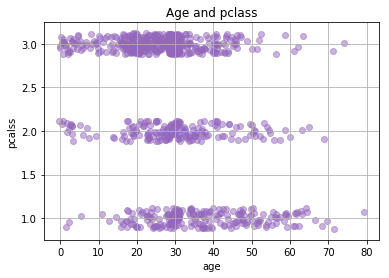

In [5]:
# 6.抖动散点图
# 抖动后
def jitter(series, factor):
    z = float(series.max()) - float(series.min())
    a = float(factor)*z/50
    return series.apply(lambda x: x+np.random.uniform(-a, a))

fig,ax = plt.subplots()
ax.set_title("Age and pclass") 
ax.set_xlabel("age") 
ax.set_ylabel("pcalss")
age = jitter(age, 1)
pclass = jitter(pclass, 3)
ax.scatter(age,pclass,alpha=0.5, c = '#9467bd') 
plt.grid(True)
plt.show()

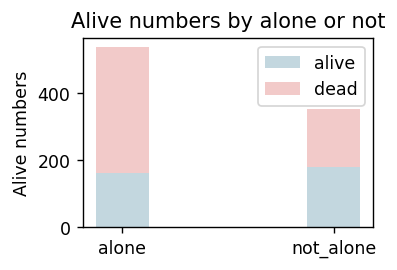

In [27]:
# 7. 绘制不同风格的堆积柱状图
width = 0.25       # the width of the bars: can also be len(x) sequence
fig,ax=plt.subplots(figsize=(3,2),dpi=125)
ax.bar(labels,alive_num, width, label = 'alive', color = '#c3d7df')
ax.bar(labels,dead_num, width, bottom = alive_num, label='dead', color = '#f2cac9')
ax.set_ylabel('Alive numbers')
ax.set_title('Alive numbers by alone or not')
ax.legend()
plt.show()

# 折线图

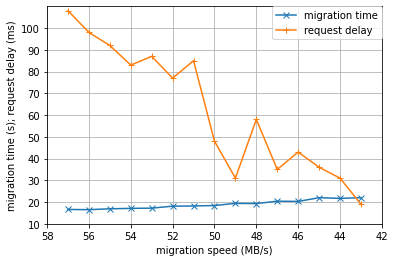

In [1]:
import matplotlib.pyplot as plt
 
migtime = [16.6,16.5,16.9,17.1,17.2,18.1,18.2,18.4,19.4,19.3,20.4,20.3,22,21.7,22]
delay = [108,98,92,83,87,77,85,48,31,58,35,43,36,31,19]
 
 
fig,ax = plt.subplots()
 
plt.xlabel('migration speed (MB/s)')
plt.ylabel('migration time (s); request delay (ms)')
 
"""set interval for y label"""
yticks = range(10,110,10)
ax.set_yticks(yticks)
 
 
"""set min and max value for axes"""
ax.set_ylim([10,110])
ax.set_xlim([58,42])
 
 
x = [57,56,55,54,53,52,51,50,49,48,47,46,45,44,43]
plt.plot(x,migtime,"x-",label="migration time")
plt.plot(x,delay,"+-",label="request delay")
 
"""open the grid"""
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
plt.show()

